In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

Streaming output truncated to the last 5000 lines.
epoch 5000
epoch 5001
epoch 5002
epoch 5003
epoch 5004
epoch 5005
epoch 5006
epoch 5007
epoch 5008
epoch 5009
epoch 5010
epoch 5011
epoch 5012
epoch 5013
epoch 5014
epoch 5015
epoch 5016
epoch 5017
epoch 5018
epoch 5019
epoch 5020
epoch 5021
epoch 5022
epoch 5023
epoch 5024
epoch 5025
epoch 5026
epoch 5027
epoch 5028
epoch 5029
epoch 5030
epoch 5031
epoch 5032
epoch 5033
epoch 5034
epoch 5035
epoch 5036
epoch 5037
epoch 5038
epoch 5039
epoch 5040
epoch 5041
epoch 5042
epoch 5043
epoch 5044
epoch 5045
epoch 5046
epoch 5047
epoch 5048
epoch 5049
epoch 5050
epoch 5051
epoch 5052
epoch 5053
epoch 5054
epoch 5055
epoch 5056
epoch 5057
epoch 5058
epoch 5059
epoch 5060
epoch 5061
epoch 5062
epoch 5063
epoch 5064
epoch 5065
epoch 5066
epoch 5067
epoch 5068
epoch 5069
epoch 5070
epoch 5071
epoch 5072
epoch 5073
epoch 5074
epoch 5075
epoch 5076
epoch 5077
epoch 5078
epoch 5079
epoch 5080
epoch 5081
epoch 5082
epoch 5083
epoch 5084
epoch 5085
epo

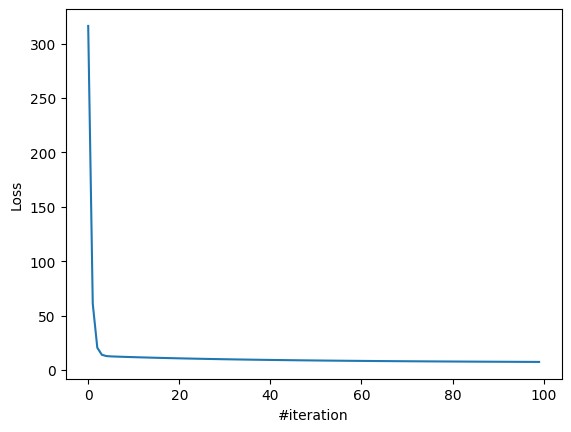

5.649540307946929


In [9]:
# Exercise 4

# Function to extract a specific column from the dataset
def get_column(data, index):
    return [row[index] for row in data]

# Prepare data by extracting features and labels from the dataset
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

# def initialize_params():
#     bias = 0
#     w1 = random.gauss(mu=0.0, sigma=0.01)
#     w2 = random.gauss(mu=0.0, sigma=0.01)
#     w3 = random.gauss(mu=0.0, sigma=0.01)

    # Comment this line for real application
def initialize_params():
  w1 = -0.01268850433497871
  w2 = 0.004752496982185252
  w3 = 0.0073796171538643845
  bias = 0
  return [bias, w1, w2, w3]

    #return [bias, w1, w2, w3]

def predict(features, weights):
    prediction = sum(f * w for f, w in zip(features, weights))
    return prediction

def compute_loss(y, y_hat):
    return (y - y_hat) ** 2

def compute_gradient_w(X_features, y, y_hat):
    N = len(X_features)
    dl_dweights = [0] * len(X_features[0])
    for i in range(N):
        for j in range(len(dl_dweights)):
            dl_dweights[j] += -2 * X_features[i][j] * (y[i] - y_hat[i])
    dl_dweights = [dw / N for dw in dl_dweights]
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] -= lr * dl_dweights[i]
    return weights

def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        loss_total = 0
        y_hat = []
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]
            y_pred = predict(features_i, weights)
            y_hat.append(y_pred)

        for i in range(N):
            loss = compute_loss(y_output[i], y_hat[i])
            loss_total += loss

        dl_dweights = compute_gradient_w(X_feature, y_output, y_hat)
        weights = update_weight(weights, dl_dweights, lr)

        losses.append(loss_total / N)
    return weights, losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=10000, lr=1e-5)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

# Question 12
print(L[9999])